In [145]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#supress errors
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv("C:/Users/Dickson/Downloads/Data Science tutorials/Data science project/my project/african_crises.csv")
df.head()
df.shape



(1059, 14)

In [146]:
df1 = df.drop(['case','cc3'], axis = 'columns')
df1.shape

(1059, 12)

In [147]:
df2 = df1.copy()
df2['conv_inflation_cpi'] = df2['exch_usd']*df2['inflation_annual_cpi']
df2.shape

(1059, 13)

In [148]:
df2.groupby('currency_crises')['currency_crises'].agg('count').sort_values(ascending = False)

currency_crises
0    923
1    132
2      4
Name: currency_crises, dtype: int64

In [149]:
#dropping unconsistent values in currency_crises column
df2.drop(df2[df2['currency_crises'] == 2].index, inplace = True)


In [150]:
df2.groupby('currency_crises')['currency_crises'].agg('count').sort_values(ascending = False)

currency_crises
0    923
1    132
Name: currency_crises, dtype: int64

In [151]:
#Convert banking_crisis to numerics.
df2['banking_crisis'].replace({'crisis':1,'no_crisis':0},inplace=True)
df2.banking_crisis.unique()

array([1, 0], dtype=int64)

In [152]:
df3 = df2.drop(['year','exch_usd','inflation_annual_cpi'], axis = 'columns')
df3.head(2)

,country,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis,conv_inflation_cpi
0,Algeria,1,0,0,0.0,0,0,0,1,0.179864
1,Algeria,0,0,0,0.0,0,0,0,0,0.747046


In [153]:
def remove_icpi_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('country'):
        m=np.mean(subdf.conv_inflation_cpi)
        sd=np.std(subdf.conv_inflation_cpi)
        reduced_df = subdf[(subdf.conv_inflation_cpi>(m-sd)) & (subdf.conv_inflation_cpi<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df4 = remove_icpi_outliers(df3)
df4.shape

(909, 10)

Text(0, 0.5, 'Count')

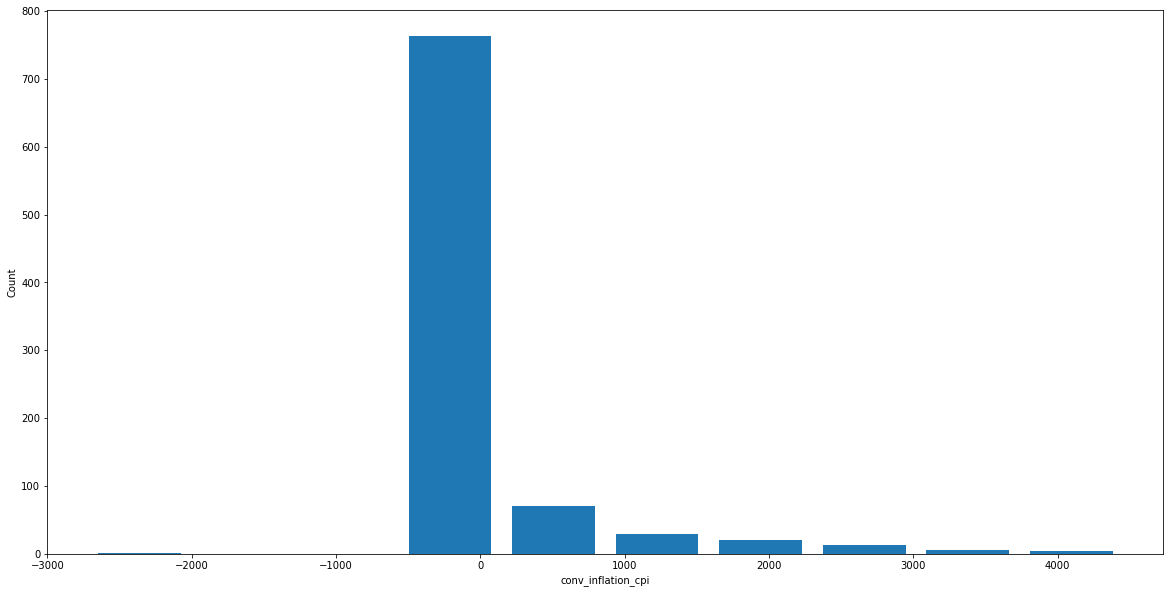

In [154]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df4.conv_inflation_cpi,rwidth=0.8)
plt.xlabel('conv_inflation_cpi')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

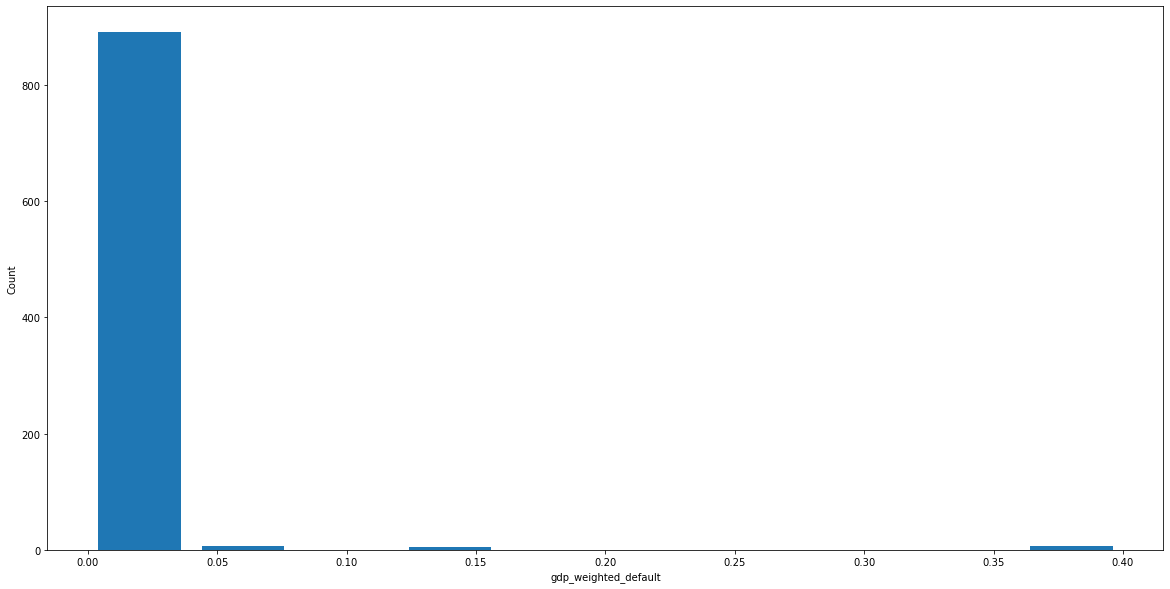

In [155]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df4.gdp_weighted_default,rwidth=0.8)
plt.xlabel('gdp_weighted_default')
plt.ylabel('Count')

In [156]:
dummies= pd.get_dummies(df4.country)
dummies.head(3)

,Algeria,Angola,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
#we now join these dummies to our main dataframe and as normal rule for dummies, we drop one column in this case other column
df5 = pd.concat([df4,dummies.drop('Zimbabwe',axis='columns')], axis='columns')
df5.head(3)

,country,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis,conv_inflation_cpi,...,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia
0,Algeria,1,0,0,0.0,0,0,0,1,0.179864,...,0,0,0,0,0,0,0,0,0,0
1,Algeria,0,0,0,0.0,0,0,0,0,0.747046,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0.0,0,0,0,0,-0.194386,...,0,0,0,0,0,0,0,0,0,0


In [158]:
#we can now drop country column since we have created dummies out of it
df6 = df5.drop('country',axis='columns')
df6.head(2)

,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis,conv_inflation_cpi,Algeria,...,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia
0,1,0,0,0.0,0,0,0,1,0.179864,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.0,0,0,0,0,0.747046,1,...,0,0,0,0,0,0,0,0,0,0


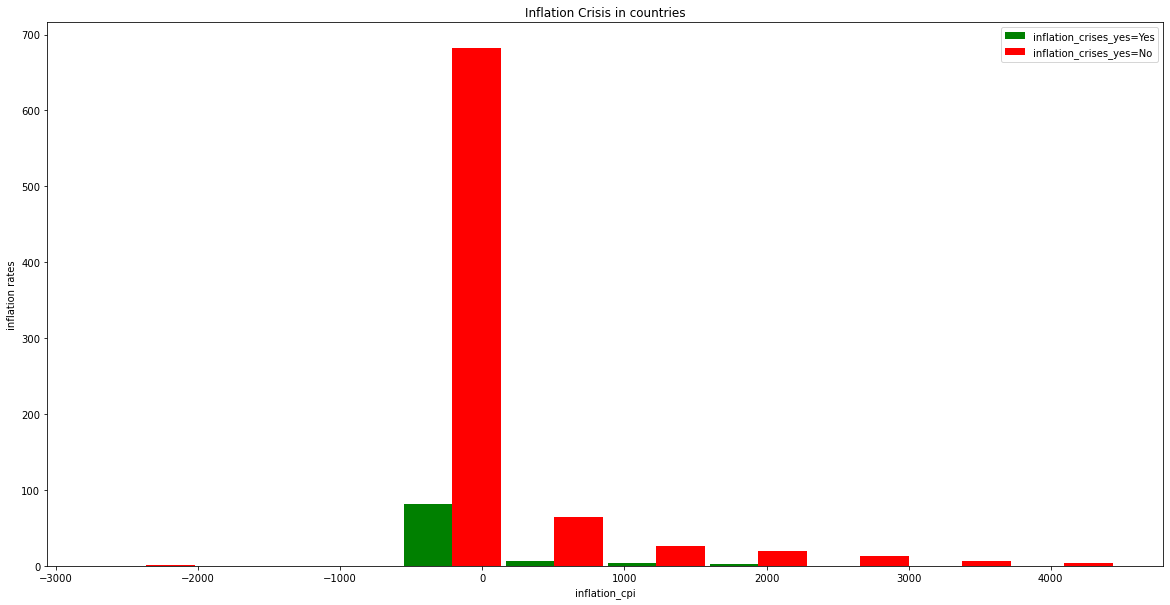

In [159]:
inflation_crises_no = df6[df6.inflation_crises==0].conv_inflation_cpi
inflation_crises_yes = df6[df6.inflation_crises==1].conv_inflation_cpi

plt.xlabel("inflation_cpi")
plt.ylabel("inflation rates")
plt.title("Inflation Crisis in countries")

plt.hist([inflation_crises_yes, inflation_crises_no], rwidth=0.95, color=['green','red'],label=['inflation_crises_yes=Yes','inflation_crises_yes=No'])
plt.legend()

In [160]:
cols_to_scale = ['gdp_weighted_default','conv_inflation_cpi']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])

for col in df6:
    print (f'{col} : {df6[col].unique()}')


systemic_crisis : [1 0]
domestic_debt_in_default : [0 1]
sovereign_external_debt_default : [0 1]
gdp_weighted_default : [0.    1.    0.325 0.9   0.15 ]
independence : [0 1]
currency_crises : [0 1]
inflation_crises : [0 1]
banking_crisis : [1 0]
conv_inflation_cpi : [0.37934107 0.37942013 0.3792889  0.37939671 0.37928848 0.37916566
 0.37930321 0.3795265  0.37930519 0.37919394 0.37934432 0.37940752
 0.37922857 0.37930592 0.37920008 0.37992662 0.38083962 0.38034096
 0.38225619 0.3825457  0.38221989 0.38419864 0.38233436 0.39082829
 0.40292815 0.39080187 0.379316   0.38260491 0.38239718 0.37883297
 0.37980385 0.38028205 0.38102072 0.38770262 0.38564101 0.38302149
 0.38132523 0.38385786 0.38112355 0.38183214 0.38331174 0.38232246
 0.38454334 0.38426285 0.38627254 0.38975042 0.38575599 0.38448361
 0.38696364 0.38466797 0.38823155 0.38357592 0.38468529 0.38382158
 0.38625606 0.38873337 0.38334594 0.38488695 0.38958508 0.39507134
 0.42572618 0.42095756 0.40443593 0.38246654 0.42487356 0.395206

In [161]:
#we now create our X and y variables
X = df6.drop('inflation_crises', axis = 'columns')
X.head()


,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,banking_crisis,conv_inflation_cpi,Algeria,Angola,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia
0,1,0,0,0.0,0,0,1,0.379341,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.0,0,0,0,0.379420,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.0,0,0,0,0.379289,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.0,0,0,0,0.379397,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.0,0,0,0,0.379288,1,0,0,0,0,0,0,0,0,0,0,0


In [162]:
y = df6.inflation_crises
y.head(2)


0    0
1    0
Name: inflation_crises, dtype: int64

In [211]:
#we can now split our dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)
len(X_train)

727

In [239]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (20,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)


Epoch 1/100
91/91 [==============================] - 2s 5ms/step - loss: 0.5559 - accuracy: 0.8638
Epoch 2/100
91/91 [==============================] - 1s 6ms/step - loss: 0.4133 - accuracy: 0.8927
Epoch 3/100
91/91 [==============================] - 1s 6ms/step - loss: 0.3486 - accuracy: 0.8927
Epoch 4/100
91/91 [==============================] - 1s 10ms/step - loss: 0.3203 - accuracy: 0.8927 0s - loss: 0.3372 
Epoch 5/100
91/91 [==============================] - 1s 10ms/step - loss: 0.3020 - accuracy: 0.8927
Epoch 6/100
91/91 [==============================] - 1s 7ms/step - loss: 0.2883 - accuracy: 0.8955
Epoch 7/100
91/91 [==============================] - 1s 6ms/step - loss: 0.2777 - accuracy: 0.9037
Epoch 8/100
91/91 [==============================] - 0s 5ms/step - loss: 0.2700 - accuracy: 0.9065
Epoch 9/100
91/91 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.9078
Epoch 10/100
91/91 [==============================] - 0s 4ms/step - loss: 0.2596 - accur

91/91 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9312
Epoch 83/100
91/91 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9257
Epoch 84/100
91/91 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.9298
Epoch 85/100
91/91 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9298
Epoch 86/100
91/91 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9298
Epoch 87/100
91/91 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.9271
Epoch 88/100
91/91 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9312
Epoch 89/100
91/91 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9230
Epoch 90/100
91/91 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9312
Epoch 91/100
91/91 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9271
Epoch 92/100


In [215]:
yp =  model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_test[:10]

529    0
92     0
593    1
781    0
396    0
177    0
415    0
193    0
810    1
714    0
Name: inflation_crises, dtype: int64

In [216]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       166
           1       0.78      0.44      0.56        16

    accuracy                           0.94       182
   macro avg       0.86      0.71      0.76       182
weighted avg       0.93      0.94      0.93       182



Text(69.0, 0.5, 'Truth')

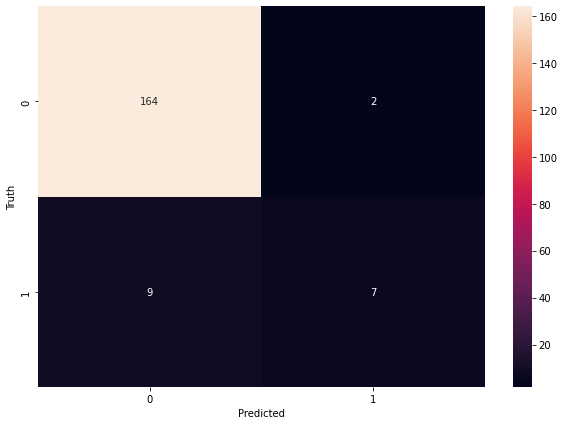

In [167]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
#We can also plot our confusion matrix.
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [170]:
df6.head(2)

,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis,conv_inflation_cpi,Algeria,...,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia
0,1,0,0,0.0,0,0,0,1,0.379341,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.0,0,0,0,0,0.379420,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.26654706679361184

In [172]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state =0)

cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.13333862, 0.09364383, 0.05548995, 0.25458735, 0.19471281])

In [240]:
def predict_inflation(country,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,banking_crisis,conv_inflation_cpi):
    coun_index = np.where(X.columns==country)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = systemic_crisis
    x[1] = domestic_debt_in_default
    x[2] = sovereign_external_debt_default
    x[3] = gdp_weighted_default
    x[4] = independence
    x[5] = currency_crises
    x[6] = banking_crisis
    x[7] = conv_inflation_cpi
    if coun_index >=0:
        x[coun_index] = 1
        
    return model.predict([x])[0]

In [233]:
predictions = np.round(predict_inflation('Kenya',0,0,0,0.5,0,0,0,72))
predictions

ValueError: in user code:

    File "C:\Users\Dickson\anaconda31\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Dickson\anaconda31\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dickson\anaconda31\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Dickson\anaconda31\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Dickson\anaconda31\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Dickson\anaconda31\lib\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_28" (type Sequential).
    
    Input 0 of layer "dense_89" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=('tf.Tensor(shape=(None,), dtype=float32)',)
      • training=False
      • mask=None


In [202]:
predictions = np.round(predict_price('Egypt',0,0,1,0.4,1,0,1,52))
predictions

1.0

In [201]:
predict_price('Egypt',0,0,1,0.4,1,0,1,52)

0.7318199337766631